<a href="https://colab.research.google.com/github/jeya014/Intelligent-Garbage-Classification-using-Deep-Learning/blob/main/nmB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Visualizing a sample of the MNIST dataset:


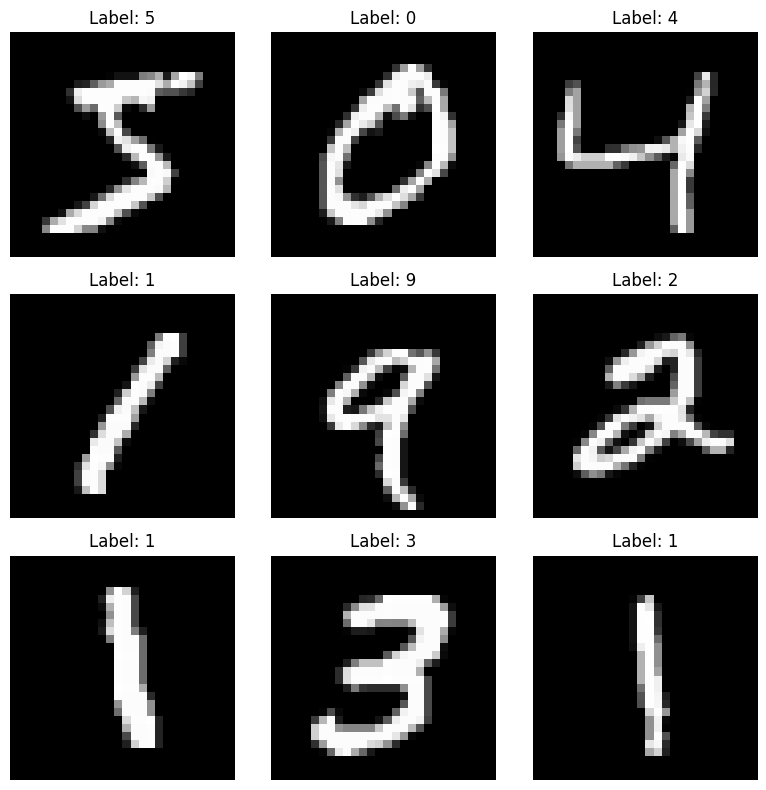

In [4]:
def visualize_images(images, labels, n=9):
    plt.figure(figsize=(8, 8))
    for i in range(n):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

print("Visualizing a sample of the MNIST dataset:")
visualize_images(X_train, y_train)

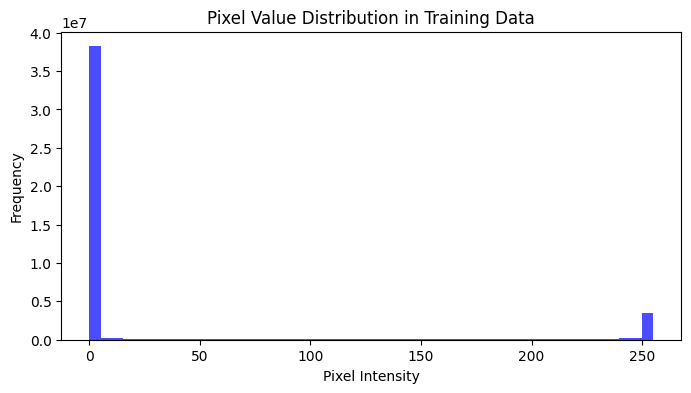

In [5]:
plt.figure(figsize=(8, 4))
plt.hist(X_train.ravel(), bins=50, color='blue', alpha=0.7)
plt.title("Pixel Value Distribution in Training Data")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [8]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into 1D array
    Dense(128, activation='relu'), # Fully connected layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
print("Training the model...")
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

Training the model...
Epoch 1/10
1500/1500 - 7s - 5ms/step - accuracy: 0.9179 - loss: 0.2893 - val_accuracy: 0.9542 - val_loss: 0.1615
Epoch 2/10
1500/1500 - 9s - 6ms/step - accuracy: 0.9619 - loss: 0.1287 - val_accuracy: 0.9674 - val_loss: 0.1144
Epoch 3/10
1500/1500 - 8s - 5ms/step - accuracy: 0.9744 - loss: 0.0871 - val_accuracy: 0.9717 - val_loss: 0.0941
Epoch 4/10
1500/1500 - 7s - 5ms/step - accuracy: 0.9807 - loss: 0.0648 - val_accuracy: 0.9727 - val_loss: 0.0944
Epoch 5/10
1500/1500 - 7s - 4ms/step - accuracy: 0.9848 - loss: 0.0499 - val_accuracy: 0.9722 - val_loss: 0.0954
Epoch 6/10
1500/1500 - 4s - 3ms/step - accuracy: 0.9884 - loss: 0.0388 - val_accuracy: 0.9750 - val_loss: 0.0888
Epoch 7/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9914 - loss: 0.0294 - val_accuracy: 0.9743 - val_loss: 0.0888
Epoch 8/10
1500/1500 - 8s - 6ms/step - accuracy: 0.9927 - loss: 0.0243 - val_accuracy: 0.9737 - val_loss: 0.0913
Epoch 9/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9943 - loss: 0.0198 - v

In [11]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 97.53%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


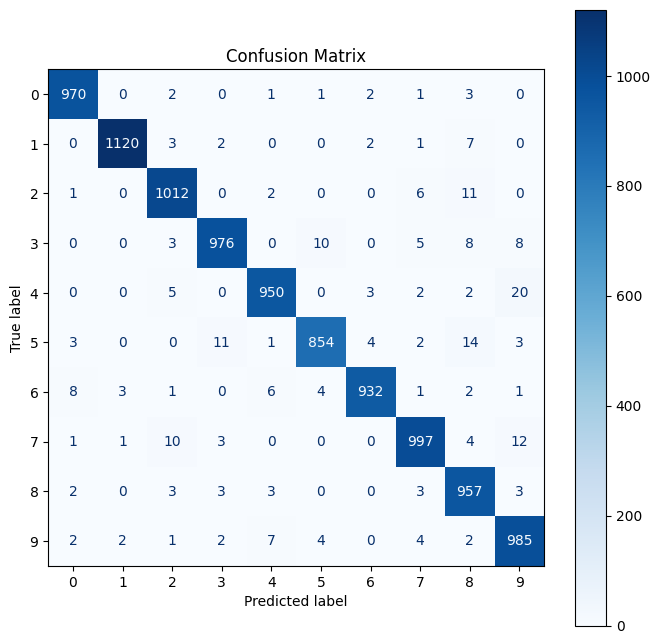

In [12]:
# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))

# Visualize confusion matrix
plt.figure(figsize=(8, 8))
disp.plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix")
plt.show()